## K-means with Scikit-Learn

Although we can build this algorithm from scratch, the good news here is that, most of the time, we won't need to. The [scikit-learn](https://scikit-learn.org/stable/) library is a very powerful machine learning library for Python. Among many other algorithms, sklearn also has its complete, ready-to-use [implementation of KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), which we'll use from now on.

It's important to note, however, that any data scientist should understand the algorithms they use, which is why it's valuable to know how to write K-means from scratch.

`scikit-learn`'s K-means has a few noteworthy features. First of all, it's very efficient — it takes advantage of much faster data structures than a Pandas DataFrame, for example.

The most important aspects of scikit-learn's implementations are the following:

- It's not restricted to two-column datasets.
- It has the `n_init` parameter. This parameter represents the number of times the entire algorithm will initialize once you run it. As the first centroids are randomly initialized, there's always a chance they won't converge to the clusters with lower possible inertia. That's why `scikit-learn` uses this parameter to run the algorithm multiple times and then selects the one that generated the lowest inertia. The default value for `n_init` is 10.
- Using K-means with `scikit-learn` is also very intuitive. As with every algorithm in the library, we have to import the `KMeans` class from `sklearn.cluster` and instantiate an object. We can use the `n_clusters` parameter to set the number of clusters. However, if we choose not to, the default is `n_clusters=8`.

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

K-means doesn't need to be trained as a classification, regression, or recommendation algorithm; therefore, we don't need to use the fit and then predict methods. Instead, we can directly call the fit_predict method, which does all the work and returns an array with the cluster for each data point.

from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
clusters = model.fit_predict()

After we `fit_predict` the `model`, we can access several attributes from the model object:

- `model.inertia_`: the inertia resulting from the clusters split.
- `model.cluster_centers_`: the coordinates of the final centroids.
- `model.n_iter_`: the number of iterations necessary to converge into the resulting clusters.
- `model.n_features_in_`: the number of features passed to the model.
- `model.feature_names_in_`: the name of the features passed to the model.

In [3]:
customers = pd.read_csv('../../Datasets/mall_customers.csv')
cols_to_keep = ['Annual Income', 'Spending Score']
customers = customers[cols_to_keep].copy()

model = KMeans(n_clusters=5)


clusters = model.fit_predict(customers)

In [4]:
model.inertia_

66532.58264851091

In [5]:
model.cluster_centers_

array([[109.7       ,  22.        ],
       [ 48.26      ,  56.48      ],
       [ 86.53846154,  82.12820513],
       [ 26.30434783,  20.91304348],
       [ 78.89285714,  17.42857143]])

In [6]:
model.n_iter_

5

In [7]:
model.n_features_in_

2

In [8]:
model.feature_names_in_

array(['Annual Income', 'Spending Score'], dtype=object)

In [9]:
import pandas as pd

cols_to_keep = ['Annual Income', 'Spending Score']


from sklearn.cluster import KMeans

# customers = pd.read_csv('mall_customers.csv')

model = KMeans(n_clusters=5)
clusters = model.fit_predict(customers[cols_to_keep])
print(clusters)
print(model.inertia_)
print(model.cluster_centers_)
print(model.n_iter_)
print(model.n_features_in_)
print(model.feature_names_in_)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]
66497.19879639814
[[ 48.26        56.48      ]
 [ 87.          18.63157895]
 [ 78.03571429  81.89285714]
 [ 26.30434783  20.91304348]
 [108.18181818  82.72727273]]
7
2
['Annual Income' 'Spending Score']


## The Elbow Rule with Scikit-Learn

Even though we're now using `scikit-learn` to segment the customers, we still need the elbow curve to determine the best number of clusters.

By using `scikit-learn`, we don't need to calculate the inertia because we can simply access it after `fit_predict` the algorithm, which means that all we need to do is to initialize the `KMeans` class multiple times for different numbers of clusters and store the results.

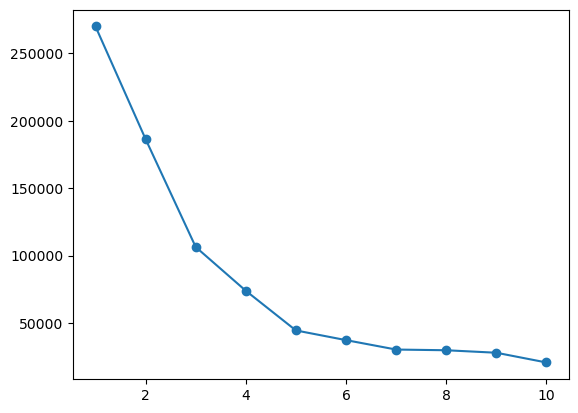

In [10]:
def plot_elbow_curve(df, max_clusters=10):
    inertias = []
    for i in range(1, max_clusters + 1):
        model = KMeans(n_clusters=i)
        model.fit_predict(df)
        inertias.append(model.inertia_)
    
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.show()
    return inertias


inertias = plot_elbow_curve(customers[cols_to_keep])

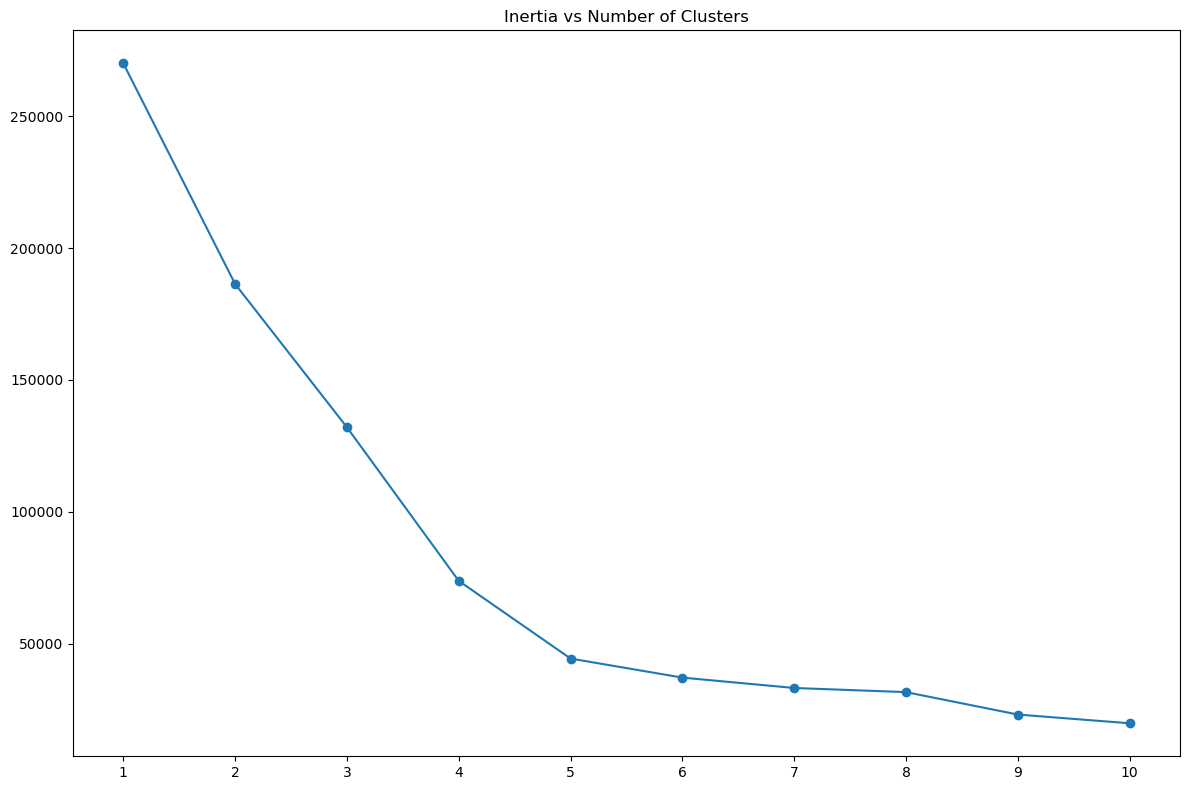

[269981.28000000014, 186362.95600651755, 132087.72428243395, 73880.64496247198, 44454.47647967972, 37233.81451071002, 33305.00122164656, 31734.883542062482, 23236.912123464037, 19931.41260347839]


In [11]:
cols_to_keep = ['Annual Income', 'Spending Score']


def plot_elbow_curve(df, max_clusters=10):
    inertias = []

    for k in range(1, max_clusters+1):
        model = KMeans(n_clusters=k)
        cluster = model.fit_predict(df)
        inertias.append(model.inertia_)
        
    plt.figure(figsize=(12, 8))
    plt.plot(range(1, max_clusters+1), inertias, marker='o')
    plt.xticks(ticks=range(1, max_clusters+1), labels=range(1, max_clusters+1))
    plt.title('Inertia vs Number of Clusters')

    plt.tight_layout()
    plt.show()
    
    return inertias
  

inertias = plot_elbow_curve(customers[cols_to_keep])
print(inertias)

## Scaling the Data

Most machine learning algorithms perform better when they use variables that are scaled to a certain range, and K-means is one of them.

The core of the K-means algorithm is the computation of distances between points, either for assigning clusters, calculating centroids, or calculating the inertia generated by the split. Therefore, if the variables in the dataset are of incomparable magnitudes, this could be an issue.

Let's say we have a variable that's measured in kilograms and another measured in millimeters. If the data is about human beings, for instance, the values for weight will probably be around dozens of kilograms while the height will be in the thousands. This means the axis in a scatterplot won't be in the same proportion, and points that are more distant in the height axis will be highly penalized.

Therefore, we need to bring all the features to a similar scale:

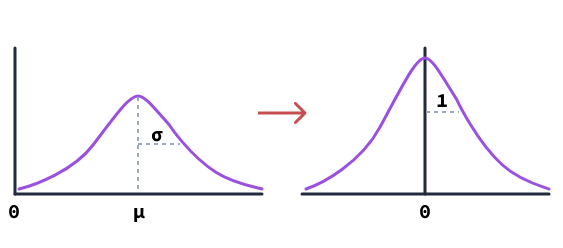

For this, `scikit-learn` has the `StandardScaler` class that performs the standardization of the data.

The standardization is done by calculating the z-score for each observation in a column. This is the z-score formula:

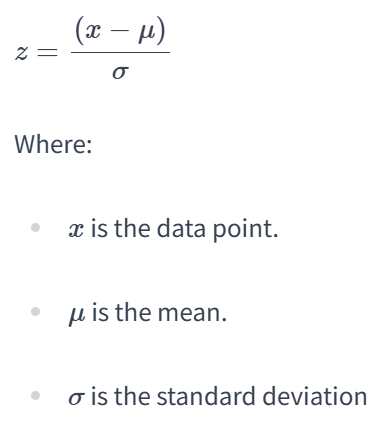

Just like the `KMeans` class, using the `StandardScaler` is also very intuitive. After we instantiate an object, we call `fit` and then `transform` and assign the result back to a variable:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

df_scaled = scaler.transform(df)

The returned object is a Numpy `ndarray`. If we print its first five rows, we'll see something like this:

print(type(df_scaled))
print(df_scaled[:5])

numpy.ndarray

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

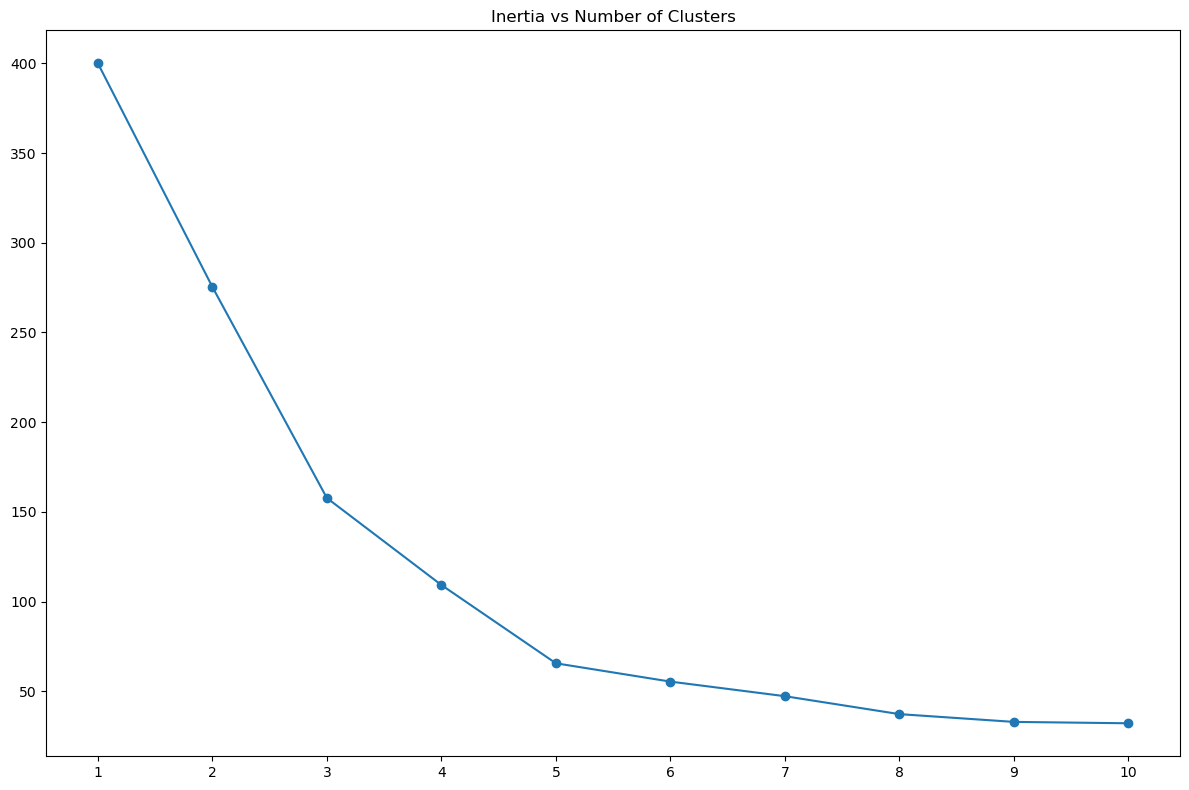

[399.99999999999994,
 275.36694411010654,
 157.70400815035939,
 109.22822707921345,
 65.57885579985046,
 55.37581558455639,
 47.24618869337496,
 37.24595372674167,
 32.91645050982752,
 32.148345840613906]

In [12]:
from sklearn.preprocessing import StandardScaler

def scaler(df):
    scaler = StandardScaler()
    return scaler.fit_transform(df)

df = scaler(customers[cols_to_keep])

plot_elbow_curve(df)

Yes, the lower values after standardization resulted in lower inertia.

## Multivariate K-Means

On the previous screen, we scaled the data before plotting the elbow curve. As you probably noticed, the shape of the curve is the same, which means that the decreased rate of inertia didn't suffer big changes. However, the values of inertia are lower, which makes total sense since we now have lower values in the dataset.

Now that we understand how to use `scikit-learn` for clustering, we'll build on that to start segmenting the data using all the variables available and not only two.

However, once we change or add more variables, it's necessary to plot the elbow curve again as it will be different from the last.

Also, notice that two of our columns need to be resolved:

1. `CustomerID`: this is the unique identifier for each customer and shouldn't be used for machine learning.

2. `Gender`: this is a categorical column that is stored as text. We'll need to convert it into a numerical column.

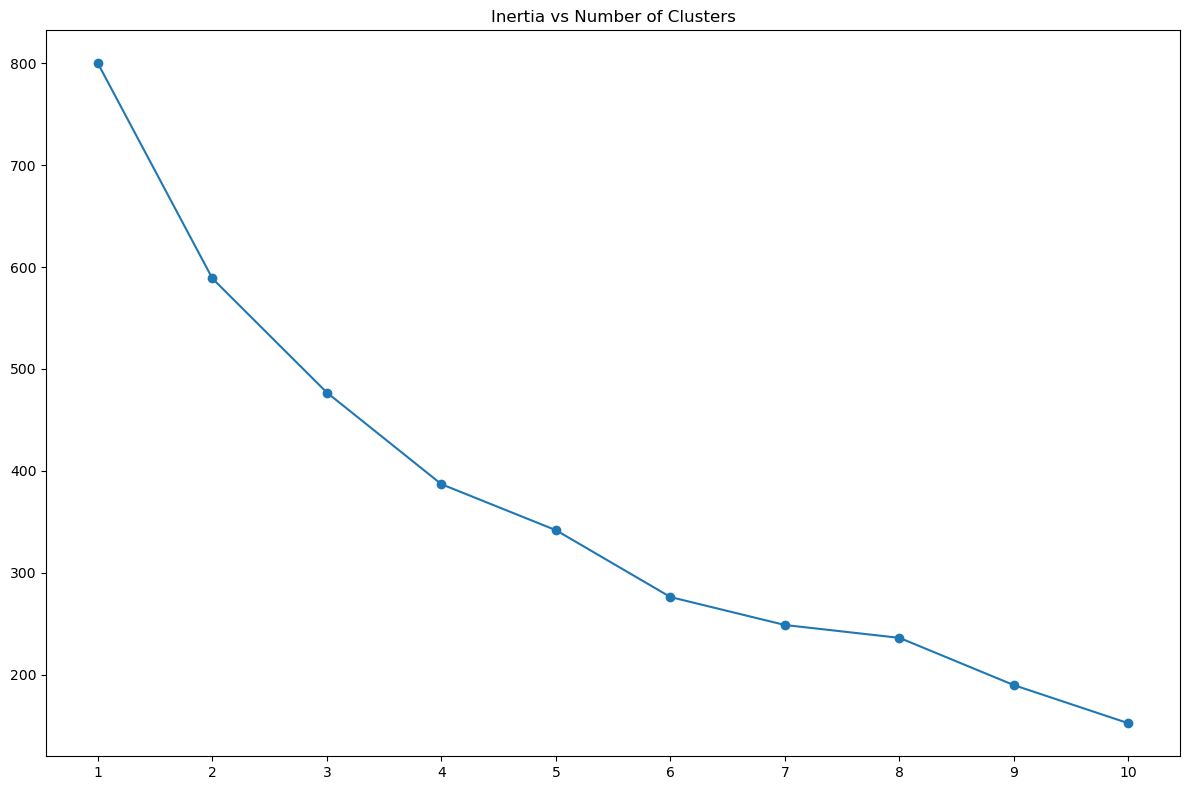

[800.0000000000003,
 588.8026767824932,
 476.78755441351575,
 386.82842558376643,
 341.6695757399024,
 276.0532501302092,
 248.5918167489468,
 235.97751224561333,
 189.54708138279625,
 152.1180132761412]

In [13]:
customers = pd.read_csv('../../Datasets/mall_customers.csv')

customers_modif = customers.copy()
customers_modif.drop('CustomerID', axis=1, inplace=True)
customers_modif['Gender'] = customers_modif.apply(lambda row: 1 if row['Gender'] == 'Male' else 0, axis=1)

scaled_customers = scaler(customers_modif)
plot_elbow_curve(scaled_customers)

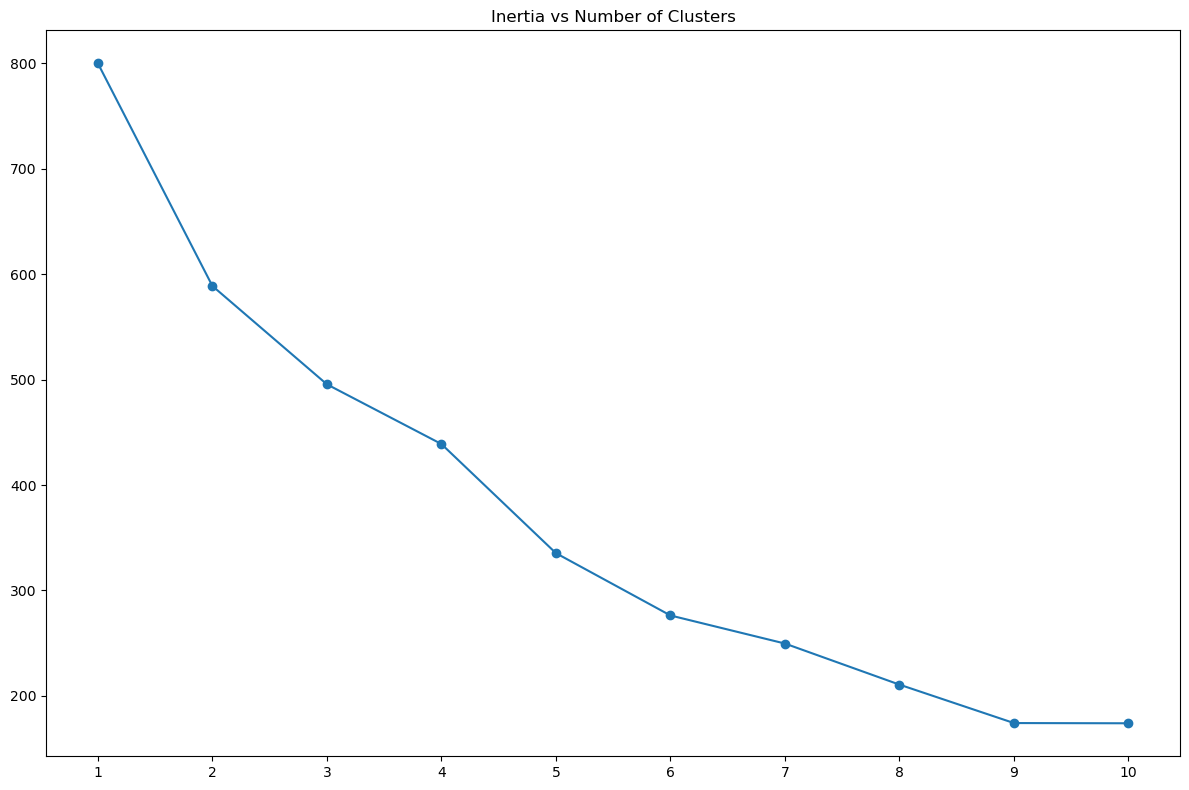

[800.0000000000003,
 588.8026767824932,
 495.5176577131132,
 438.88317594300474,
 335.3676985891376,
 276.25366882448077,
 249.61099494693883,
 210.64588028485025,
 174.18800022186812,
 173.9778540191651]

In [14]:
scaled_customers = scaler(customers_modif)
plot_elbow_curve(scaled_customers)

## Multivariate K-Means

You probably had a hard time deciding the best number of clusters from the Elbow Curve you plotted on the previous screen. There wasn't a clear, sharp elbow in the curve.

Unfortunately, that happens more than we'd like when segmenting data. If we check the percentage loss of inertia, we'll notice that decrease is much slower than the one we saw in the previous lesson:

Previous lesson:

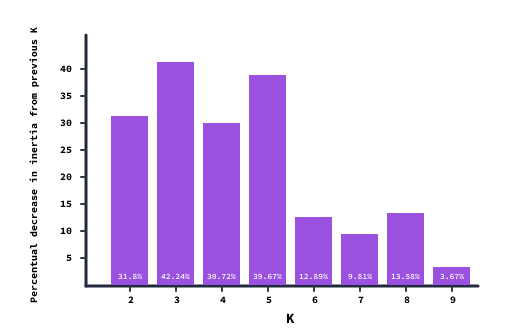

Now:



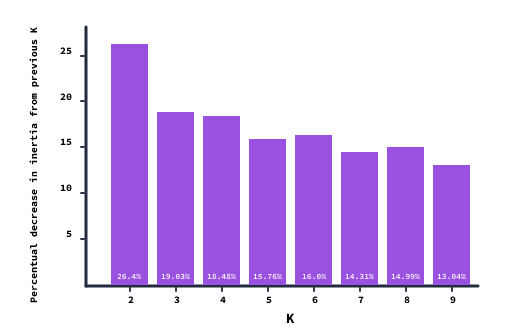

Here are some possible solutions:

- Gather more data.

- Look for new features.

- Look for business rules or insights that might lead to a decision for one cluster over another.

- Try different numbers of clusters, and see how the split goes in each of them.

The best possible candidates here are five, six, and seven clusters. For the sake of learning, we'll choose six and move on to the split and then interpret the results.

In [15]:
model = KMeans(n_clusters=6)
clusters = model.fit_predict(scaled_customers)

customers['Cluster'] = clusters + 1

print(customers['Cluster'].value_counts())

Cluster
5    48
2    41
1    39
3    28
4    27
6    17
Name: count, dtype: int64


##  Interpreting Results — Numerical Variables

We have segmented the data on the previous screen, and we can see three clusters have a very similar number of occurrences while the other three are a bit smaller.

Now, it's time to interpret the results and summarize the characteristics of each cluster and differentiate them from each other based on the variables used for the segmentation.

First, we'll analyze the numerical variables and see how they behave in each cluster. For instance, we want to find information like the following:

- Cluster 1 has, on average, a very high income.

- Cluster 5 has, on average, the youngest clients.

m


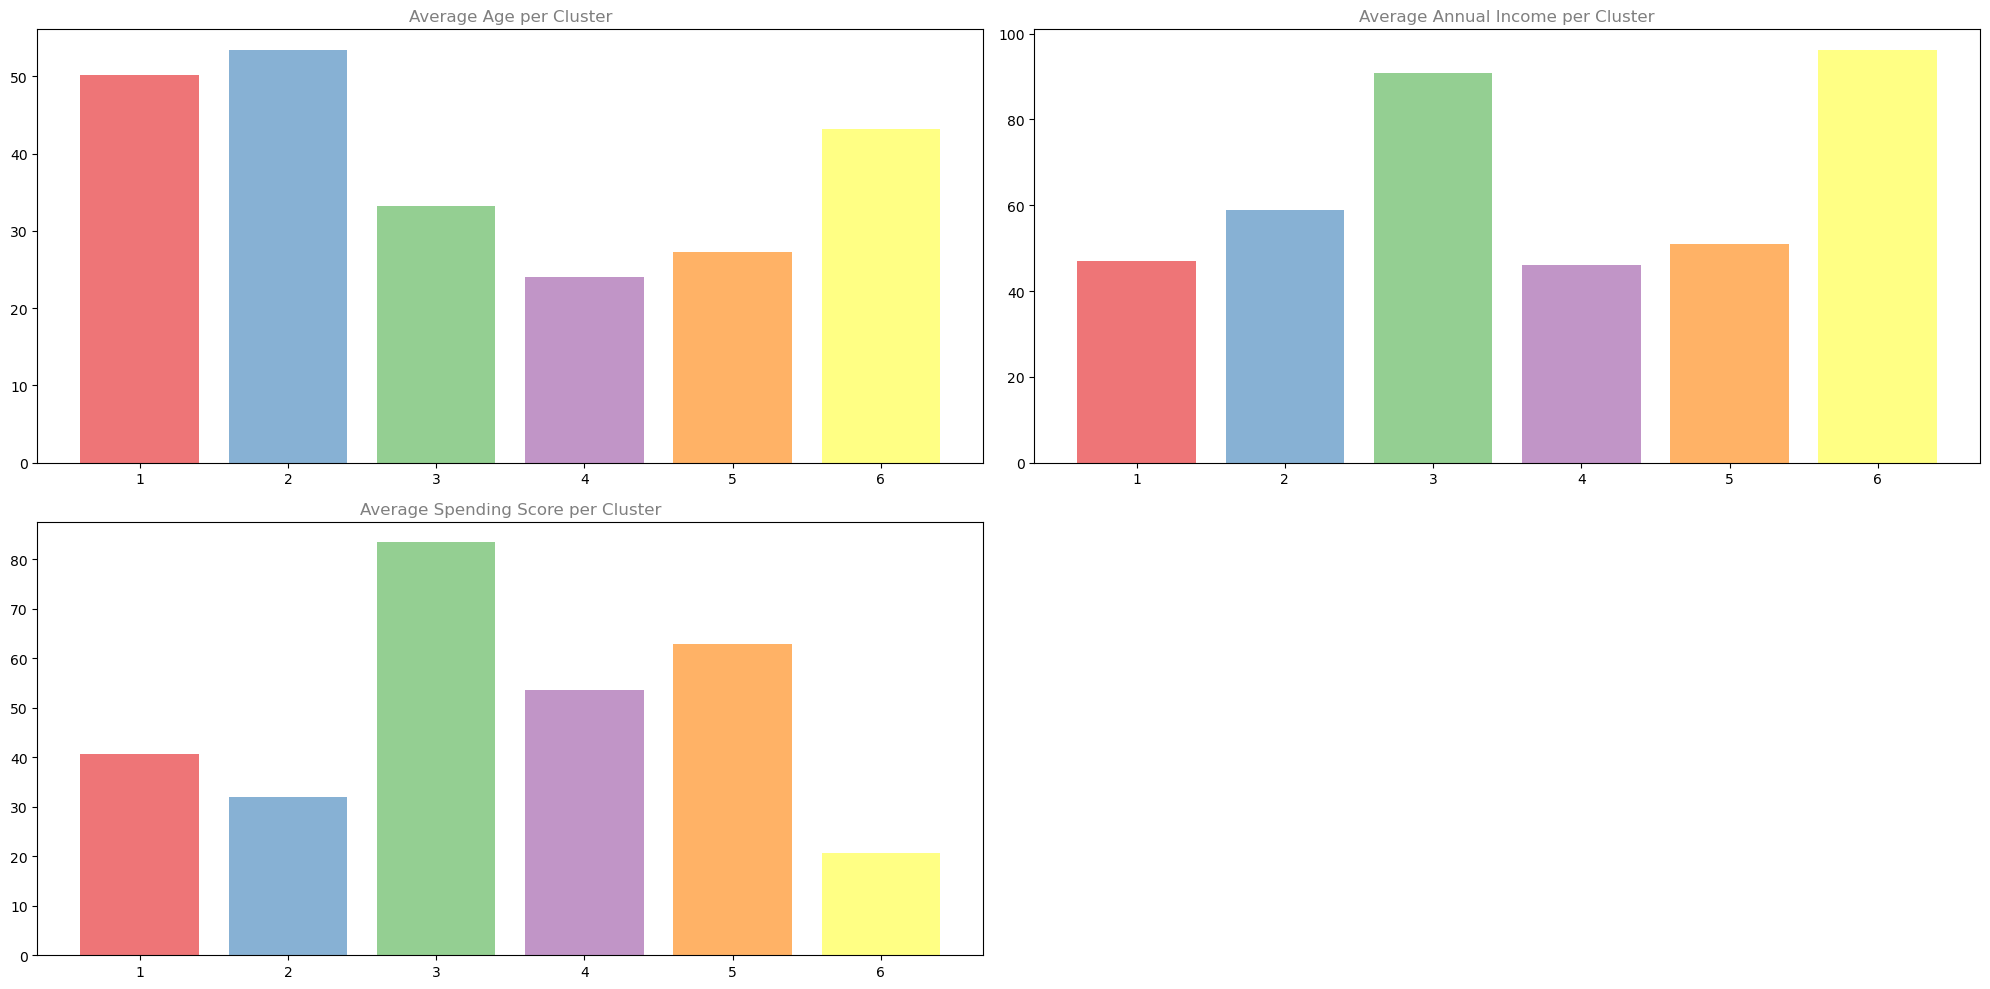

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['Age', 'Annual Income', 'Spending Score']
print('m')


fig = plt.figure(figsize=(20, 10))
for i, column in enumerate(numeric_columns):
    df_plot = customers.groupby('Cluster')[column].mean()
    ax = fig.add_subplot(2, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

## Interpreting Results — Numerical Variables, Part 2

The conclusions from the previous screen enable us to understand each cluster and then use them to make business decisions. For instance, customers in cluster 6 have a very high income but the lowest spending score. This means that they could've spent more money in our company.

With this kind of information, the marketing team could develop a campaign focused on this cluster specifically and try to incite those customers to spend more money.

However, there's more for us to investigate. Scatter plots are a great tool for understanding variable distribution between clusters. To plot these charts, `seaborn.scatterplot` is a great tool because it easily allows us to plot the data grouped by a variable through the parameter `hue`.

In the previous lesson, we ended up with a chart like this:

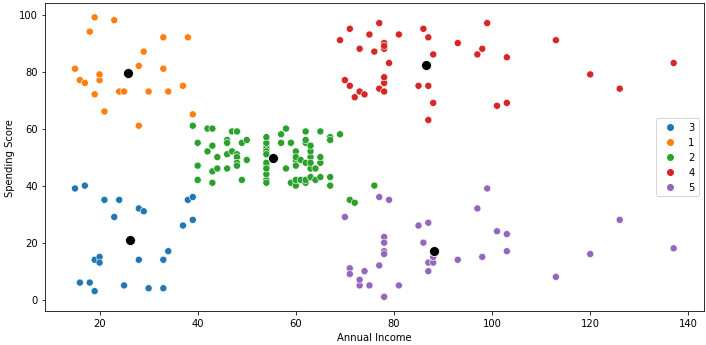

Since we were using only two variables for clustering, this plot alone tells us a lot:

- Cluster 1 has a high `Spending Score` but low `Annual Income`.
- Cluster 4 has a high `Spending Score` but a high `Annual Income`.

Now that we have three numerical variables, we'll need more plots to be able to see the entire picture.

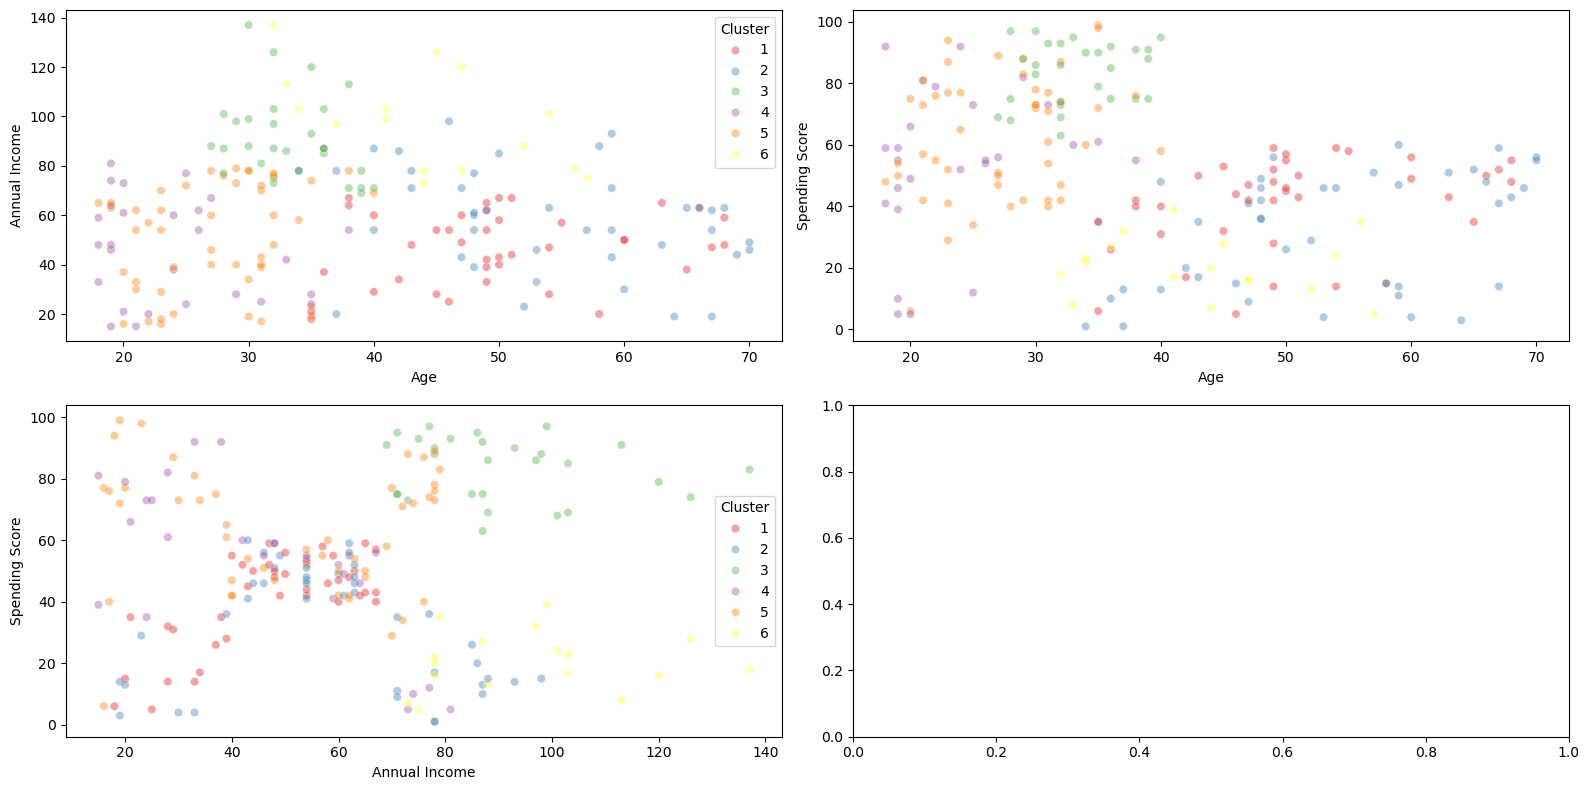

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axs = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='Age', y='Annual Income', hue='Cluster', data=customers, palette='Set1', alpha=0.4, ax=axs[0][0])

sns.scatterplot(x='Age', y='Spending Score', hue='Cluster', data=customers, palette='Set1', alpha=0.4, ax=axs[0][1], legend=False)

sns.scatterplot(x='Annual Income', y='Spending Score', hue='Cluster', data=customers, palette='Set1', alpha=0.4, ax=axs[1][0])

plt.tight_layout()
plt.show()

##  Interpreting Results — Categorical Variables

Plots like those on the previous two screens are useful for understanding how numerical variables behave between clusters. While the bar charts show each variable at a time per cluster, the scatter plots enable us to easily understand how two variables relate to each other.

For instance, the third plot in the previous lesson shows us that cluster 5 contains customers with high income and high scores, while cluster 4 has a high score but low income.

So, now we need to understand how the categorical column `Gender` impacts the cluster split. Is the cluster with customers from only one gender? Are any clusters equally divided between men and women?

Unlike the numerical columns, a scatter plot wouldn't show much value when analyzing a categorical column, even if you transformed the text value to numeric again. Therefore, our goal is to visualize the percentage of each category (male and female) in each one of our six clusters, like so:

- Cluster 3 has 15% of men and 85% of women.

To achieve that, we'll take advantage of the [pandas.crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) function. This function performs cross-tabulation in order to compute the frequency of a variable given another one, like the example below:

In [29]:
plot_df = pd.crosstab(
  index=customers['Cluster'], columns=customers['Gender'],
  values=customers['Gender'], aggfunc='size', normalize='index'
)
plot_df

Gender,Female,Male
Cluster,,
1,1.000000,0.000000
2,0.000000,1.000000
3,0.357143,0.642857
4,0.000000,1.000000
5,1.000000,0.000000
6,0.882353,0.117647


Where:

- `index`: the values to be grouped in the rows

- `columns`: the values to be grouped in the columns

- `values`: the values to be aggregated given an aggregation function

- `aggfunc='size'`: the aggregation function — the size method returns the number of occurrences

-` normalize='index'`: the values will be normalized over each row, and we'll see the percentage value

This is a sample of the outcome:

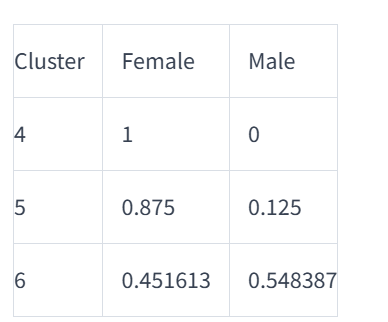

By looking at this outcome, we can already see some patterns. However, if we had more columns, it would be much more difficult to evaluate all of them. That's why we want to visualize these results in a plot.

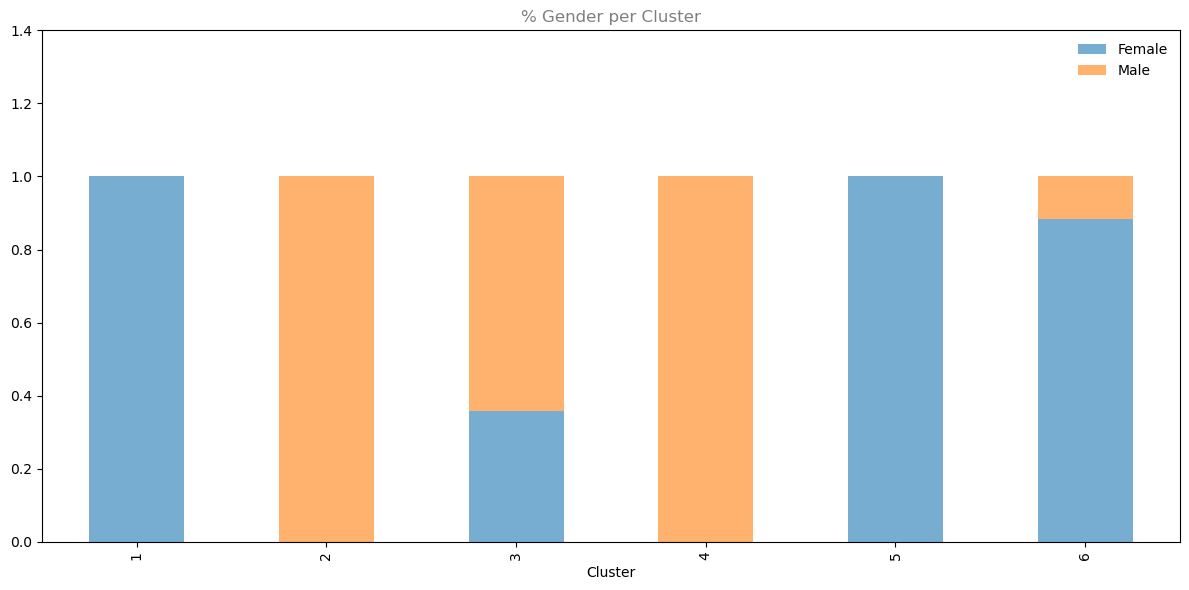

In [35]:
plot_df = pd.crosstab(
  index=customers['Cluster'], columns=customers['Gender'],
  values=customers['Gender'], aggfunc='size', normalize='index'
)


fig, ax = plt.subplots(figsize=(12,6))
plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
ax.set_title(f'% Gender per Cluster', alpha=0.5)

ax.set_ylim(0, 1.4)
ax.legend(frameon=False)
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

## Review
Now that we've analyzed how each variable behaves between clusters, combine all the conclusions and write a couple of lines describing each cluster based on the distributions of all variables for each one of them. This is an important step in order to understand the characteristics of each cluster and how to take advantage of them.

During this course, we accomplished the following:

- We covered the basics of unsupervised machine learning and explored the K-means algorithm.

- We built our own version of this algorithm.

- We covered the concepts of Euclidean Distance and Inertia, and we learned how to calculate centroids coordinates as well as plot the elbow curve and choose the number of clusters.

Next, we have a project for you that asks you to practice everything you've learned throughout these lessons.